# **IMPLEMENTATION**

## **DATASET PREPARATION**

In [ ]:
! pip install datasets transformers
! pip install transformers[torch]
! pip install accelerate -U

In [ ]:
from datasets import *
import pandas as pd
import numpy as np
import os
from PIL import Image


In [ ]:
train_dataset_dict = {
    'image_file_path' : [],
    'image' : [],
    'labels' : []
}

validate_dataset_dict = {
    'image_file_path' : [],
    'image' : [],
    'labels' : []
}

test_dataset_dict = {
    'image_file_path' : [],
    'image' : [],
    'labels' : []
}

In [ ]:
root = '/content/drive/MyDrive/breast_cancer_reduced/'
image_root = '/content/drive/MyDrive/breast_cancer_reduced/jpeg/'

In [ ]:
df = pd.read_csv(root+'dataset_df.csv')
df.head()

,image file path,pathology
0,D:\Dataset\breast_cancer_reduced\jpeg\0.jpeg,MALIGNANT
1,D:\Dataset\breast_cancer_reduced\jpeg\1.jpeg,MALIGNANT
2,D:\Dataset\breast_cancer_reduced\jpeg\2.jpeg,BENIGN
3,D:\Dataset\breast_cancer_reduced\jpeg\3.jpeg,BENIGN
4,D:\Dataset\breast_cancer_reduced\jpeg\4.jpeg,BENIGN_WITHOUT_CALLBACK


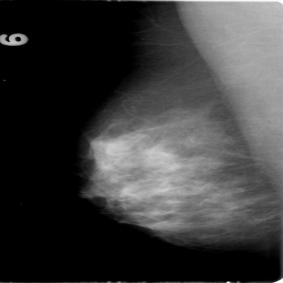

In [ ]:
Image.open(image_root + df['image file path'][1].split('\\')[-1])

In [ ]:
train_s, test_s, val_s = int(df.shape[0]*0.8), int(df.shape[0]*0.1), int(df.shape[0]*0.1)
train_s, test_s, val_s

(2854, 356, 356)

In [ ]:
def adder(dt_dict, img_loc, img, lbl):
  img = img.convert('RGB')
  dt_dict['image_file_path'].append(img_loc)
  dt_dict['image'].append(img)
  dt_dict['labels'].append(lbl)

def fun1(s, e):
  print("start :", s, e)
  for idx in range(s, e):
    img_loc = image_root + df['image file path'][idx].split('\\')[-1]
    img = Image.open(img_loc)

    adder(train_dataset_dict, img_loc, img, df['pathology'][idx])
  print("end :", s, e)
  # if idx > train_s:
  #   adder(train_dataset_dict, img_loc, img, df['pathology'][idx])
  # elif idx > test_s:
  #   adder(test_dataset_dict, img_loc, img, df['pathology'][idx])
  # else:
  #   adder(validate_dataset_dict, img_loc, img, df['pathology'][idx])

In [ ]:
train_s, train_s+test_s

(2854, 3210)

In [ ]:
def fun2():
  for idx in range(train_s, train_s+test_s):
    img_loc = image_root + df['image file path'][idx].split('\\')[-1]
    img = Image.open(img_loc)\

    adder(test_dataset_dict, img_loc, img, df['pathology'][idx])
  print("fun2")


In [ ]:
train_s+test_s, train_s+test_s+val_s

(3210, 3566)

In [ ]:
def fun3():
  for idx in range(train_s+test_s, train_s+test_s+val_s):
    img_loc = image_root + df['image file path'][idx].split('\\')[-1]
    img = Image.open(img_loc)

    adder(validate_dataset_dict, img_loc, img, df['pathology'][idx])
  print("fun3")

In [ ]:
import threading

if __name__ =="__main__":
  threads = []
  for e in range(200, train_s, 200):
    # print(e-200, e)
    t1 = threading.Thread(target = fun1, args=(e-200,e))
    t1.start()
    threads.append(t1)

  for t in threads:
    t.join()


start :start : start : 400 600
 200 400
start : 600 800
0 200
start : 800 1000
start : 1000 1200
start : 1200 1400
start : 1400 1600
start : 1600 start :1800
start : 2000 2200
 1800 2000
start : 2200 2400
start : 2400 2600
start : 2600 2800
end : 400 600
end : 2200 2400
end : 1400 1600
end : end : 1800 10002000 1200

end : 2400 2600
end : 0 200
end : 2000 2200
end : 1200 1400
end : 2600 2800
end : 600 800
end : 1600 1800
end : 200 400
end : 800 1000


In [ ]:
len(train_dataset_dict['image'])
fun1(2800, 2854)

start : 2800 2854
end : 2800 2854


In [ ]:
fun2()
fun3()

fun2
fun3


In [ ]:
dataset = DatasetDict({
    'train':Dataset.from_dict(train_dataset_dict),
    'test':Dataset.from_dict(test_dataset_dict),
    'validate':Dataset.from_dict(validate_dataset_dict)},
)

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 2854
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 356
    })
    validate: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 356
    })
})

In [ ]:
import pickle

ds_file = open(root+"dataset", 'ab')

pickle.dump(dataset, ds_file)
ds_file.close()

## **Fine Tune**

In [ ]:
from datasets import *
import pandas as pd
import numpy as np
import os
from PIL import Image

In [ ]:
import pickle

ds_file = open(root+"dataset", 'rb')

dataset = pickle.load(ds_file)

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 2854
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 356
    })
    validate: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 356
    })
})

In [ ]:
np.array(dataset['test']['image'][2])

array([[[193, 193, 193],
        [227, 227, 227],
        [250, 250, 250],
        ...,
        [247, 247, 247],
        [255, 255, 255],
        [255, 255, 255]],

       [[217, 217, 217],
        [224, 224, 224],
        [236, 236, 236],
        ...,
        [241, 241, 241],
        [245, 245, 245],
        [249, 249, 249]],

       [[164, 164, 164],
        [158, 158, 158],
        [171, 171, 171],
        ...,
        [240, 240, 240],
        [242, 242, 242],
        [244, 244, 244]],

       ...,

       [[227, 227, 227],
        [226, 226, 226],
        [226, 226, 226],
        ...,
        [236, 236, 236],
        [241, 241, 241],
        [246, 246, 246]],

       [[226, 226, 226],
        [226, 226, 226],
        [226, 226, 226],
        ...,
        [243, 243, 243],
        [255, 255, 255],
        [255, 255, 255]],

       [[232, 232, 232],
        [232, 232, 232],
        [231, 231, 231],
        ...,
        [253, 253, 253],
        [255, 255, 255],
        [250, 250, 250]]

In [ ]:
lmaps = {'BENIGN_WITHOUT_CALLBACK' : 0, 'MALIGNANT' : 1, 'BENIGN' : 2}

In [ ]:
def lconvervet(smp):
    smp['labels'] = lmaps[smp['labels']]
    return smp

dataset = dataset.map(lconvervet)

Map:   0%|          | 0/2854 [00:00<?, ? examples/s]

Map:   0%|          | 0/356 [00:00<?, ? examples/s]

Map:   0%|          | 0/356 [00:00<?, ? examples/s]

In [ ]:
np.array(dataset['test'][2])

array({'image_file_path': '/content/drive/MyDrive/breast_cancer_reduced/jpeg/2856.jpeg', 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=280x280 at 0x7D11B3A1B790>, 'labels': 1},
      dtype=object)

In [ ]:
from transformers import ViTFeatureExtractor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
feature_extractor(dataset['test'][2]['image'], return_tensors='pt')

{'pixel_values': tensor([[[[ 0.6157,  0.8431,  0.8667,  ...,  0.8980,  0.9608,  0.9843],
          [ 0.5373,  0.5765,  0.6157,  ...,  0.8745,  0.8980,  0.9294],
          [-0.3020, -0.3020, -0.2314,  ...,  0.8510,  0.8745,  0.9059],
          ...,
          [ 0.7333,  0.7255,  0.7176,  ...,  0.8980,  0.8745,  0.8902],
          [ 0.7725,  0.7725,  0.7647,  ...,  0.8667,  0.9216,  0.9686],
          [ 0.8118,  0.8118,  0.7961,  ...,  0.9216,  0.9843,  0.9765]],

         [[ 0.6157,  0.8431,  0.8667,  ...,  0.8980,  0.9608,  0.9843],
          [ 0.5373,  0.5765,  0.6157,  ...,  0.8745,  0.8980,  0.9294],
          [-0.3020, -0.3020, -0.2314,  ...,  0.8510,  0.8745,  0.9059],
          ...,
          [ 0.7333,  0.7255,  0.7176,  ...,  0.8980,  0.8745,  0.8902],
          [ 0.7725,  0.7725,  0.7647,  ...,  0.8667,  0.9216,  0.9686],
          [ 0.8118,  0.8118,  0.7961,  ...,  0.9216,  0.9843,  0.9765]],

         [[ 0.6157,  0.8431,  0.8667,  ...,  0.8980,  0.9608,  0.9843],
          [ 0

In [ ]:
def process_example(example):
    inputs = feature_extractor(example['image'], return_tensors='pt')
    inputs['labels'] = example['labels']
    return inputs

In [ ]:
process_example(dataset['test'][4])

{'pixel_values': tensor([[[[ 0.7961,  0.7882,  0.7882,  ...,  0.9843,  0.9922,  0.9922],
          [ 0.5373,  0.5373,  0.5373,  ...,  0.9137,  0.9686,  0.9843],
          [-0.3804, -0.3804, -0.3725,  ...,  0.7098,  0.8745,  0.9843],
          ...,
          [ 0.7725,  0.7804,  0.7882,  ...,  0.6941,  0.6941,  0.7961],
          [ 0.8039,  0.8039,  0.8039,  ...,  0.7569,  0.7569,  0.8353],
          [ 0.8196,  0.8118,  0.8039,  ...,  0.8196,  0.8353,  0.9137]],

         [[ 0.7961,  0.7882,  0.7882,  ...,  0.9843,  0.9922,  0.9922],
          [ 0.5373,  0.5373,  0.5373,  ...,  0.9137,  0.9686,  0.9843],
          [-0.3804, -0.3804, -0.3725,  ...,  0.7098,  0.8745,  0.9843],
          ...,
          [ 0.7725,  0.7804,  0.7882,  ...,  0.6941,  0.6941,  0.7961],
          [ 0.8039,  0.8039,  0.8039,  ...,  0.7569,  0.7569,  0.8353],
          [ 0.8196,  0.8118,  0.8039,  ...,  0.8196,  0.8353,  0.9137]],

         [[ 0.7961,  0.7882,  0.7882,  ...,  0.9843,  0.9922,  0.9922],
          [ 0

In [ ]:
def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = feature_extractor([x for x in example_batch['image']], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['labels'] = example_batch['labels']
    return inputs

prepared_ds = dataset.with_transform(transform)

In [ ]:
prepared_ds = dataset.with_transform(transform)

In [ ]:
prepared_ds['train'][0:2]

{'pixel_values': tensor([[[[-1.0000, -1.0000, -1.0000,  ..., -0.9451, -0.7961, -0.6706],
          [-1.0000, -1.0000, -1.0000,  ..., -0.9451, -0.7961, -0.6706],
          [-1.0000, -1.0000, -1.0000,  ..., -0.9451, -0.7961, -0.6706],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.6784, -0.2078,  0.4588],
          [-1.0000, -1.0000, -1.0000,  ..., -0.2627,  0.4039,  0.8824],
          [-1.0000, -1.0000, -1.0000,  ...,  0.5529,  0.9137,  0.9686]],

         [[-1.0000, -1.0000, -1.0000,  ..., -0.9451, -0.7961, -0.6706],
          [-1.0000, -1.0000, -1.0000,  ..., -0.9451, -0.7961, -0.6706],
          [-1.0000, -1.0000, -1.0000,  ..., -0.9451, -0.7961, -0.6706],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.6784, -0.2078,  0.4588],
          [-1.0000, -1.0000, -1.0000,  ..., -0.2627,  0.4039,  0.8824],
          [-1.0000, -1.0000, -1.0000,  ...,  0.5529,  0.9137,  0.9686]],

         [[-1.0000, -1.0000, -1.0000,  ..., -0.9451, -0.7961, -0.6706],
          [-1

In [ ]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }

In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

<ipython-input-35-3044fb6e3895>:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [ ]:
from transformers import ViTForImageClassification


labels = ['BENIGN_WITHOUT_CALLBACK', 'MALIGNANT', 'BENIGN']

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir=root+"/vit-base-b-cancer",
  per_device_train_batch_size=8,
  evaluation_strategy="steps",
  num_train_epochs=8,
  fp16=True,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_ds["validate"],
    tokenizer=feature_extractor,
)

### TRAINING

In [ ]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

Step,Training Loss,Validation Loss,Accuracy
100,1.053900,0.996408,0.384831
200,1.057800,0.995094,0.367978
300,1.064000,1.054283,0.410112
400,1.084600,0.930760,0.396067
500,1.065700,1.002610,0.367978
600,0.930100,0.985593,0.432584
700,1.139300,0.915397,0.530899
800,0.915300,0.983578,0.418539
900,1.015200,0.999810,0.477528
1000,0.867800,0.912701,0.449438


***** train metrics *****
  epoch                    =          8.0
  total_flos               = 1647801105GF
  train_loss               =       0.8891
  train_runtime            =   0:18:10.45
  train_samples_per_second =       20.938
  train_steps_per_second   =        2.619


### **METRICS**

In [ ]:
metrics = trainer.evaluate(prepared_ds['validate'])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =        8.0
  eval_accuracy           =     0.4494
  eval_loss               =     0.9001
  eval_runtime            = 0:00:05.20
  eval_samples_per_second =     68.367
  eval_steps_per_second   =      8.642


In [ ]:
from transformers import AutoImageProcessor
image_processor = AutoImageProcessor.from_pretrained(root+"/vit-base-b-cancer")

In [ ]:
image = dataset["test"]["image"][200]

print(image)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=190x190 at 0x7D1042A8D210>


In [ ]:
model_name_fine_tuned = root+"/vit-base-b-cancer"

from transformers import ViTForImageClassification

labels = ['BENIGN_WITHOUT_CALLBACK', 'MALIGNANT', 'BENIGN']

model = ViTForImageClassification.from_pretrained(
    model_name_fine_tuned,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

In [ ]:
inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

# model predicts one of the 3 classes
predicted_label = logits.argmax(-1).item()
predicted_label
# print(model.config.id2label[predicted_label])

2